### Timeseries Using Keras Recurrent Neural Network (LSTM)

#### Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load dataset

In [2]:
dataset = pd.read_csv('app.csv')
# parse the time columns into standard timestamp
dataset.loc[:,'time'] = pd.to_datetime(dataset.loc[:,'time'])
# set the parsed timestamp as index
dataset.set_index(['time'], drop=True, inplace=True)
dataset.head()

,users
time,
2018-12-22 09:00:00,64
2018-12-22 10:00:00,79
2018-12-22 11:00:00,97
2018-12-22 12:00:00,107
2018-12-22 13:00:00,105


#### Check frequency of the timeseries data

In [3]:
pd.infer_freq(dataset.index)

'H'

In [4]:
# isolate test data from training data
# our model takes previous 3 time instance values to predict upcoming 5 time instances
real_data = dataset.iloc[-5:,:]
test_data = dataset.iloc[-8:-5,:]
train_data = dataset.iloc[:-8,:]

#### Create time lags for feature engineering

In [5]:
# shifting the column to creates time lag features
main_dataset = train_data
main_dataset['users+1'] = train_data['users'].shift(-1)
main_dataset['users+2'] = train_data['users'].shift(-2)
main_dataset['users+3'] = train_data['users'].shift(-3)
main_dataset['users+4'] = train_data['users'].shift(-4)
main_dataset['users+5'] = train_data['users'].shift(-5)
main_dataset['users+6'] = train_data['users'].shift(-6)
main_dataset['users+7'] = train_data['users'].shift(-7)
main_dataset.dropna(inplace=True)
main_dataset.head()

/home/rahulsnair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rahulsnair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/rahulsnair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,users,users+1,users+2,users+3,users+4,users+5,users+6,users+7
time,,,,,,,,
2018-12-22 09:00:00,64,79.0,97.0,107.0,105.0,111.0,109.0,119.0
2018-12-22 10:00:00,79,97.0,107.0,105.0,111.0,109.0,119.0,121.0
2018-12-22 11:00:00,97,107.0,105.0,111.0,109.0,119.0,121.0,123.0
2018-12-22 12:00:00,107,105.0,111.0,109.0,119.0,121.0,123.0,118.0
2018-12-22 13:00:00,105,111.0,109.0,119.0,121.0,123.0,118.0,128.0


#### Feature scaling

In [6]:
#normalize all the features for the machine learning model to learn fast
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X = sc_X.fit_transform(main_dataset.iloc[:,0:3])
y = sc_y.fit_transform(main_dataset.iloc[:,3:])

#### Reshape the features into 3D array for LSTM

In [7]:
# reshape the input features (X) to a 3D input for the RNN (recurrent neural network) to feed on
X_train = X.reshape(X.shape[0],1,X.shape[1])
y_train = y

#### Keras RNN with LSTM

In [8]:
# Recurrent Neural Netowrk (RNN) with Long Short Term Memory (LSTM)
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (None, X_train.shape[2])))
# Adding a second LSTM layer
regressor.add(LSTM(units = 30, return_sequences = True))
# Adding a third LSTM layer
regressor.add(LSTM(units = 30, return_sequences = True))
# Adding a fourth LSTM layer
regressor.add(LSTM(units = 30))
# Adding the output layer
regressor.add(Dense(units = y_train.shape[1]))

# Compiling the RNN
# rmsprop is the best optimizer for RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
regressor.summary()

Using TensorFlow backend.






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 30)          4080      
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 30)          7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 30)          7320      
_________________________________________________________________
lstm_4 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 155       
Total params: 26,195
Trainable params: 26,195
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Fitting the RNN to the Training set (actual training happens here)
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/300





154/154 [==============================] - 20s 130ms/step - loss: 0.2328
Epoch 2/300
154/154 [==============================] - 0s 393us/step - loss: 0.2168
Epoch 3/300
154/154 [==============================] - 0s 387us/step - loss: 0.2013
Epoch 4/300
154/154 [==============================] - 0s 366us/step - loss: 0.1841
Epoch 5/300
154/154 [==============================] - 0s 377us/step - loss: 0.1642
Epoch 6/300
154/154 [==============================] - 0s 368us/step - loss: 0.1422
Epoch 7/300
154/154 [==============================] - 0s 418us/step - loss: 0.1185
Epoch 8/300
154/154 [==============================] - 0s 391us/step - loss: 0.0941
Epoch 9/300
154/154 [==============================] - 0s 390us/step - loss: 0.0736
Epoch 10/300
154/154 [==============================] - 0s 421us/step - loss: 0.0595
Epoch 11/300
154/154 [==============================] - 

#### Prediction on test data

In [10]:
# do prediction on test data
test_input = sc_X.transform(np.array(test_data['users']).reshape(1,-1))
prediction = sc_y.inverse_transform(regressor.predict(test_input.reshape(test_input.shape[0],1,test_input.shape[1])))

/home/rahulsnair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<function matplotlib.pyplot.show(*args, **kw)>

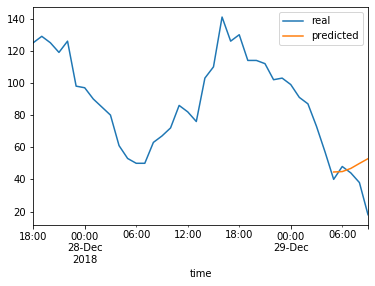

In [11]:
# vizulaization on test data prediction
real_data['prediction'] = prediction.reshape(-1,1)
plotting = dataset[['users']]
plotting['predicted'] = real_data['prediction'] 
plotting.columns = ['real', 'predicted']
plotting.iloc[-40:,:].plot.line()
plt.show